# Análisis de Ventas de Amazon

En este proyecto de análisis de datos, se examinan los datos de ventas de Amazon para comprender mejor el comportamiento de compra de los clientes. Se utiliza un conjunto de datos que incluye información como la fecha de la orden, el estado de la orden, el canal de ventas, la categoría de producto, el tamaño, el estado del servicio de mensajería, etc. El objetivo es realizar un análisis exploratorio de los datos para identificar patrones, tendencias y obtener información significativa que pueda ayudar en la toma de decisiones comerciales.

* Order ID: Identificador único de la orden.
* Date: Fecha de la orden.
* Status: Estado de la orden (Cancelado, Enviado, Entregado, etc.).
* Fulfilment: Cumplimiento de la orden (Amazon, Comerciante, etc.).
* Sales Channel: Canal de ventas utilizado para la orden (Amazon.in, etc.).
* ship-service-level: Nivel de servicio de mensajería utilizado.
* Category: Categoría del producto.
* Size: Tamaño del producto.
* Courier Status: Estado del servicio de mensajería (En camino, Enviado, etc.).
* Qty: Cantidad de productos ordenados.
* currency: Moneda utilizada para la transacción.
* Amount: Monto de la orden.
* ship-city: Ciudad de envío.
* ship-state: Estado de envío.
* ship-postal-code: Código postal de envío.
* ship-country: País de envío.
* B2B: Indicador de si el comprador es un cliente B2B (True/False).
* fulfilled-by: Método de cumplimiento de la orden (Easy Ship, etc.).
* New: Información adicional (posiblemente relacionada con el estado de la orden).
* PendingS: Información adicional (posiblemente relacionada con el estado de la orden).

## Análisis de Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

Primera vista general al dataset

In [2]:
dataset = pd.read_csv('../Datasets/Amazon Sale Report.csv', encoding= 'unicode_escape')
dataset

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

## Pre procesamiento
Tras leer el resumen que nos dio dataset.info() procederemos con algunas estrategias que nos facilitarán el posterior análisis

Renombramos la columna Qty a Quantity

In [4]:
dataset.rename(columns={'Qty':'Quantity'}, inplace=True)

Nos deshacemos de columnas vacias quienes no aportan valor.

In [5]:
dataset.drop(['index', 'New','PendingS'], axis=1, inplace=True)

Convertimos postal code a objeto pues es buena practica evitar que datos numéricos no operables, ya que preserva la integridad y la interpretación correcta de los datos. 

No hay sentido en sumar un código postal y su número no representa orden superior a otro, además pueden existir casos donde hayan números 0 al inicio de un código postal, lo cual seria información que se perderia si lo convirtieramos a entero  

In [6]:
dataset['ship-postal-code'] = dataset['ship-postal-code'].astype('object')

Convertimos Date a formato fecha y creamos columnas separadas para el día, mes y año, ello nos facilitará el análisis

In [159]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['Year'] = dataset['Date'].dt.year
dataset['Week'] = dataset['Date'].dt.dayofweek

Verificamos presencia de nulos

In [7]:
dataset.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Quantity                  0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

Elegimos la estrategia de deshacernos de los campos quienes tienen al menos un nulo

In [8]:
filas_perdidas = len(dataset) - dataset.dropna().shape[0]
dataset.dropna(inplace=True)

print("Número de filas perdidas:", filas_perdidas)
print("Quedan {} filas".format(dataset.shape[0]))


Número de filas perdidas: 91462
Quedan 37514 filas


# Exploratory Data Analysis

In [9]:
dataset.describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


In [10]:
dataset.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-postal-code,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514.0,37514,37514
unique,34664,91,11,1,1,1,8,11,3,1,4698,58,6205.0,1,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,201301.0,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,312.0,37514,37514


Del resumen que nos brinda dataset.describe() podemos interpretar lo siguiente:
* **Quantity**:
    * La cantidad promedio de productos ordenados por pedido es de aproximadamente 0.87, lo que sugiere que la mayoría de los pedidos consisten en una sola unidad del producto.
    * Llama la atención que haya mínimo de 0 en Quantity, parece que este dato significa que se cancelo el pedido.
* **Amount**:
    * También me sorprende que haya registros donde el Amount es de 0, revisando los registros veo que tienen marcado el estado como entregado
* **Fulfillment**: 
    * Todos los pedidos parecen ser gestionados por un único servicio de cumplimiento.
* **Sales Channel**:
    * Todos los pedidos se realizan a través del mismo canal de ventas.
* **Ship Service Level**:
    * Todas las entregas parecen utilizar el mismo nivel de servicio de envío.
* **Courier Status**:
    * Todos los pedidos están marcados como enviados a través del mismo servicio de mensajería.
* **Currency**:
    * Todos los pagos se realizan en la misma moneda.
* **Ship Country**:
    * Todas las entregas se realizan al mismo país.
* **Fulfilled By**:
    * Todos los pedidos parecen ser atendidos por la misma entidad.

Estos ultimos hallazgos plantea algunas posibles interpretaciones:

1. **Limitaciones del Servicio:** La presencia de un único valor en estos campos podría indicar restricciones o políticas específicas de Amazon que limitan las opciones disponibles para los clientes. Podría ser beneficioso investigar más a fondo las razones detrás de estas limitaciones y su impacto en la experiencia del cliente.

2. **Nicho de Mercado Potencial:** Por otro lado, esta uniformidad también podría señalar un nicho de mercado poco explotado. Explorar las preferencias y necesidades de los clientes que se ajustan a estos parámetros únicos podría revelar oportunidades para expandir los servicios ofrecidos o adaptar estrategias de marketing para satisfacer mejor a este segmento de clientes.

En conclusión, comprender por qué estos campos muestran un único valor único podría proporcionar información valiosa sobre las políticas comerciales de Amazon y las oportunidades de mercado aún sin explotar.

### Verificaremos algunas teorias usando python

In [143]:
filtro = (dataset['Quantity'] == 0) & (dataset['Status'] != 'Cancelled')
filas_no_canceladas = dataset.loc[filtro]
if filas_no_canceladas.empty:
    print("Todo campo Quantity con valor 0 implica que el estado del pedido es cancelado")


Todo campo Quantity con valor 0 implica que el estado del pedido es cancelado


In [144]:
filtro = (dataset['Amount'] == 0) & (dataset['Status'] != 'Cancelled')
registros_con_monto_cero = len(dataset[filtro])

if registros_con_monto_cero > 0:
    print("Hay registros con Amount de 0 y no están cancelados. Esto podría indicar que el pedido fue gratis debido a algún descuento.")
else:
    print("Todos los registros con Amount de 0 son distintos de un estado cancelado. Esto puede indicar que el pedido fue gratis por alguna razón.")

Hay registros con Amount de 0 y no están cancelados. Esto podría indicar que el pedido fue gratis debido a algún descuento.


In [145]:
unique_values_columns = ['Fulfilment', 'Sales Channel', 'ship-service-level', 'Courier Status', 'currency', 'ship-country', 'fulfilled-by']

for column in unique_values_columns:
    unique_value = dataset[column].unique()[0]
    print(f"La columna '{column}' tiene un único valor único: {unique_value}")


La columna 'Fulfilment' tiene un único valor único: Merchant
La columna 'Sales Channel' tiene un único valor único: Amazon.in
La columna 'ship-service-level' tiene un único valor único: Standard
La columna 'Courier Status' tiene un único valor único: On the Way
La columna 'currency' tiene un único valor único: INR
La columna 'ship-country' tiene un único valor único: IN
La columna 'fulfilled-by' tiene un único valor único: Easy Ship


## Graficos

### Analizando Amount: observamos que tan grande son los montos por pedido

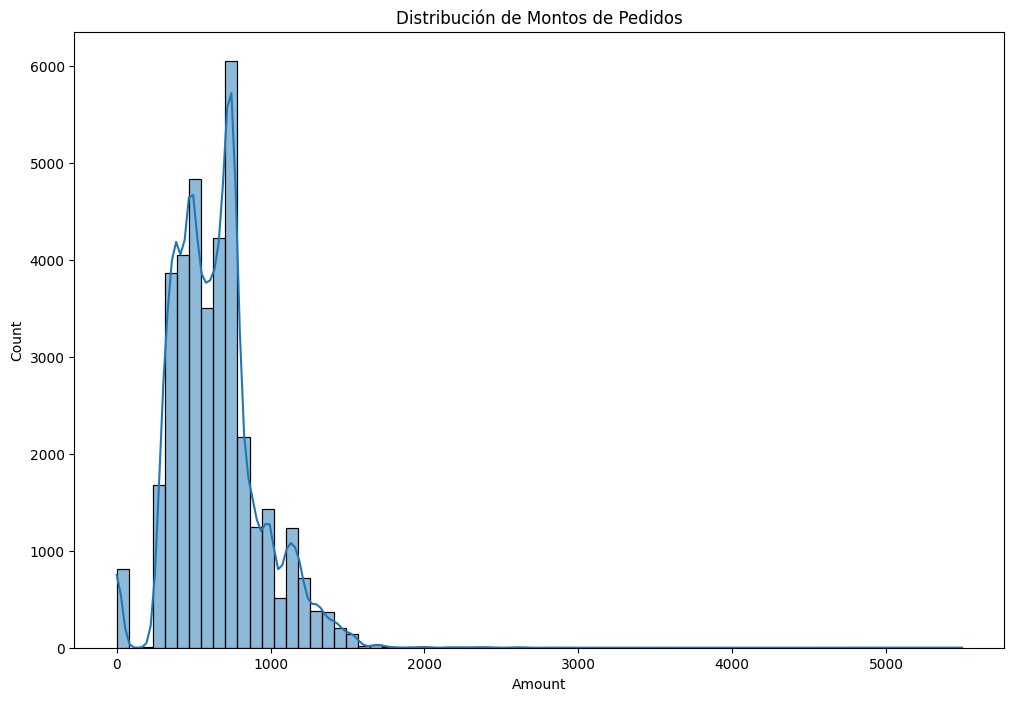

In [215]:
plt.figure(figsize=(12, 8))
sns.histplot(data=dataset['Amount'], kde=True, bins=70, stat="count")
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribución de Montos de Pedidos')
plt.show()


La mayoría de los pedidos se encuentran entre 600 y 1000 INR, en donde su  densidad de pedidos es mayor en el rango de S/ 1000 a S/ 2000.

Parece que hay algunos pedidos que llegan a 5000, pero vamos a filtrar por Cantidad igual a 1

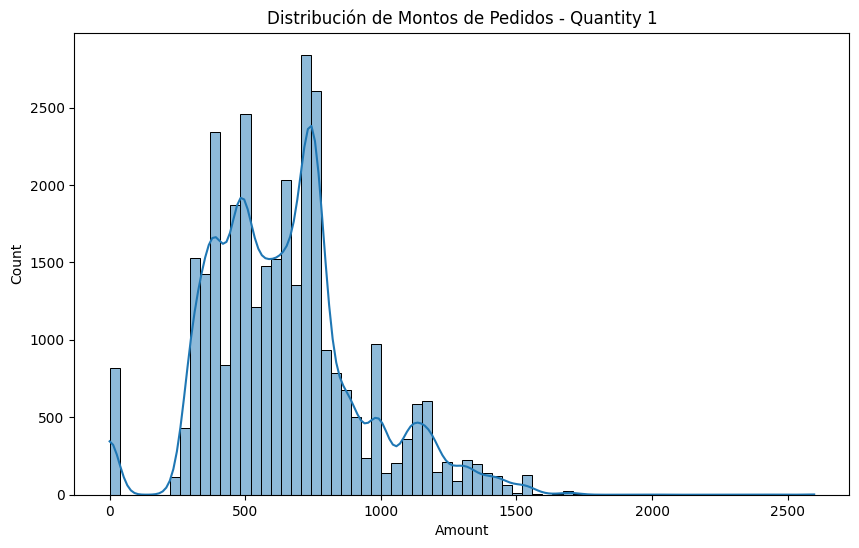

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset[dataset['Quantity'] == 1]['Amount'], kde=True, bins=70)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribución de Montos de Pedidos - Quantity 1')
plt.show()

Hay pedidos con un solo producto que estan entre los 600 INR

La empresa podría enfocarse en estrategias de marketing para aumentar la cantidad de pedidos en el rango de S/ 2000 a S/ 2500. Se podría ofrecer un servicio premium para los clientes que realizan pedidos de alto valor.


### Analizando Quantity: observamos que cantidad de pedidos (1-5) es el más frecuente

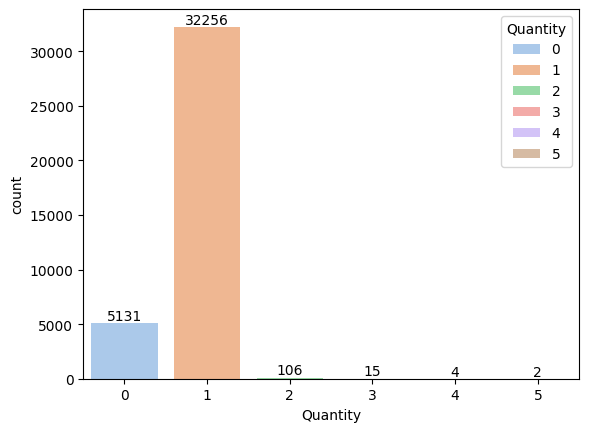

In [166]:
ax = sns.countplot(x='Quantity', hue='Quantity', data=dataset, palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

Lo usuarios, estos 3 últimos meses, han tenido gran tendencia a comprar un único pedido. Podriamos mejorar nuestro catalogo recomendado accesorios que combienen, con ropa por ejemplo, para tentar al usuario a comprar tal accesorio. Por ahora podriamos ofrecer los relojes que vendemos ofreciendolo con un descuento. 

## Analizando las categorias disponibles

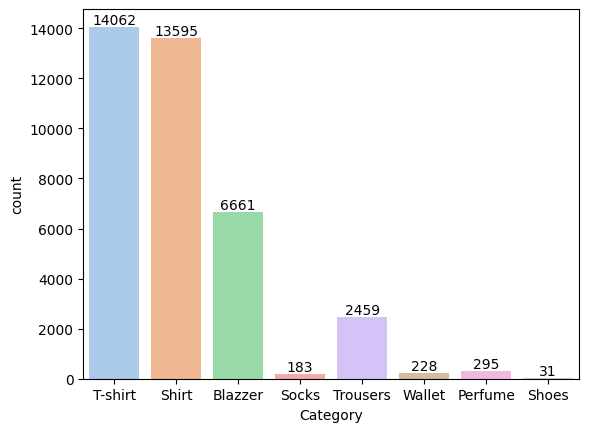

In [226]:
ax = sns.countplot(x='Category', hue='Category', data=dataset, palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)

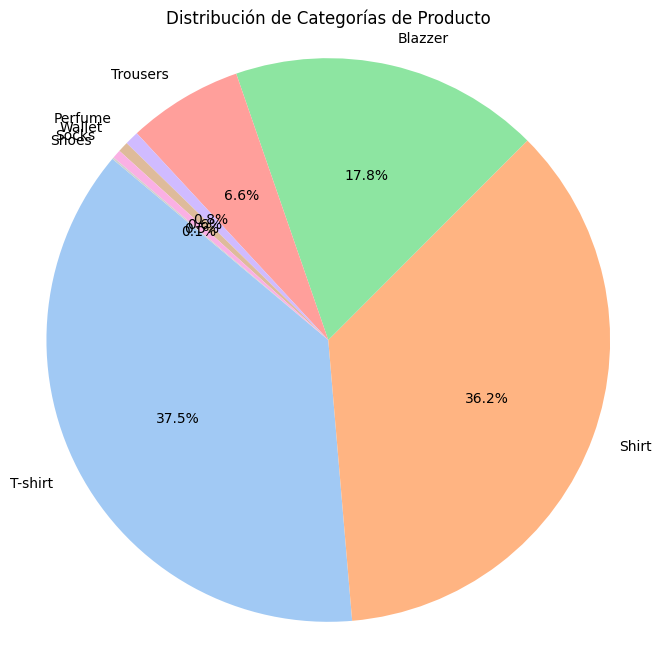

In [227]:
plt.figure(figsize=(8, 8))
category_percentages = (dataset['Category'].value_counts(normalize=True) * 100).round(1)
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Categorías de Producto')
plt.axis('equal')
plt.show()

Por gran diferencia, los porductos Shirt y T-Shirt son los más vendidos

### Analizando Size: observamos la cantidad de ventas según el tamaño de la ropa que se compro

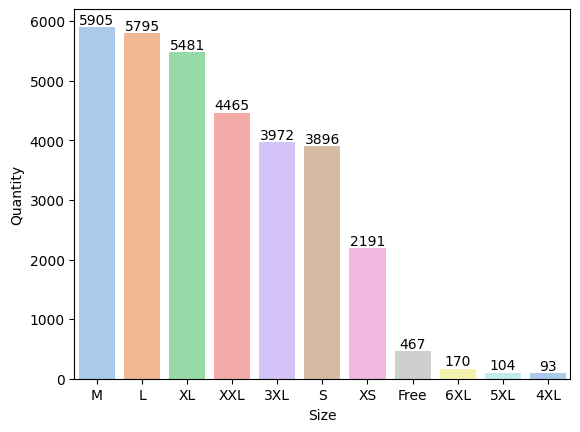

In [224]:
Size_groupby_Quantity = dataset.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
ax = sns.barplot(x='Size', hue='Size', y='Quantity', palette="pastel",data=Size_groupby_Quantity)
for bars in ax.containers:
    ax.bar_label(bars)

Las tallas de la ropa que ofrecemos. 

"Free" indica que es un articulo distinto de ropa como un reloj. 

La mayoría de los usuarios compran ropa de talla M. 

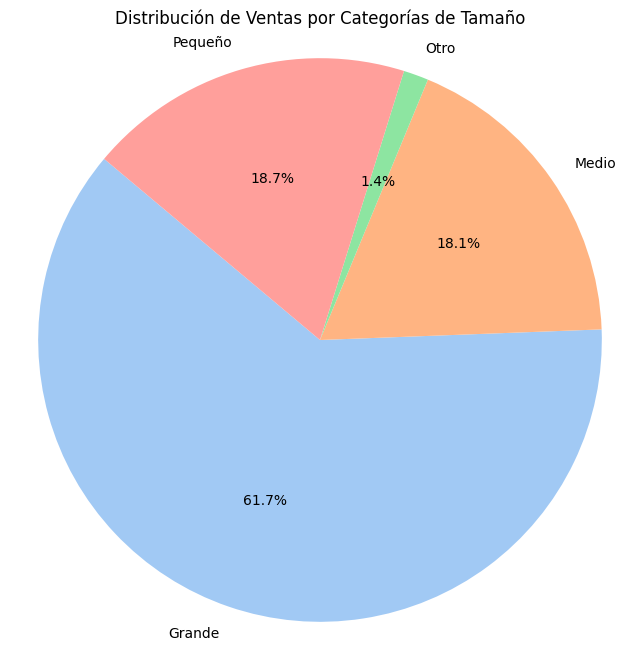

In [225]:
size_categories = {
    'S': 'Pequeño',
    'M': 'Medio',
    'L': 'Grande',
    'XL': 'Grande',
    'XXL': 'Grande',
    '3XL': 'Grande',
    '4XL': 'Grande',
    '5XL': 'Grande',
    '6XL': 'Grande',
    'XS': 'Pequeño',
    'Free': 'Otro' 
}

dataset['Size_Category'] = dataset['Size'].map(size_categories)

sales_by_size_category = dataset.groupby('Size_Category')['Quantity'].sum()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_size_category, labels=sales_by_size_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Ventas por Categorías de Tamaño')
plt.axis('equal') 
plt.show()


El gráfico de pastel muestra claramente que hay una demanda significativa de ropa en tallas grandes, lo cual es coherente con la agrupación de varias tallas grandes bajo la categoría "Grande". Esto sugiere que hay una base de clientes considerable que busca y compra tallas de ropa más grandes.

Sin embargo, la falta de detalle en las categorías más pequeñas, como "Pequeño" y "Medio", hace que sea difícil evaluar la demanda específica de estas tallas. Sería beneficioso realizar un análisis más detallado para comprender mejor las preferencias y hábitos de compra de los clientes que eligen estas tallas. 

Analizando: Courier Status 

<Axes: xlabel='Courier Status', ylabel='count'>

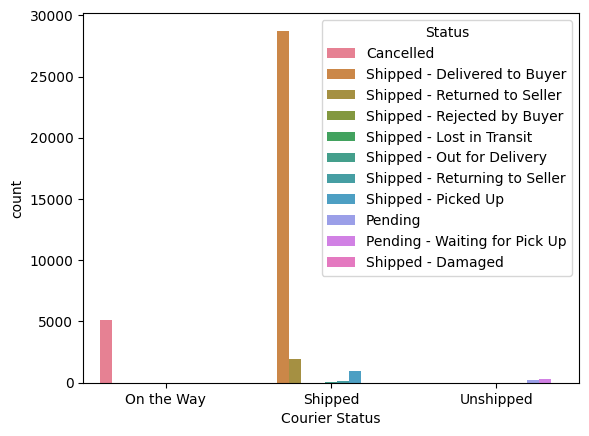

In [47]:
sns.countplot(x='Courier Status',hue= 'Status', data=dataset)

La mayoria de pedidos fueron entregados por con exito al comprador.

### Fecha

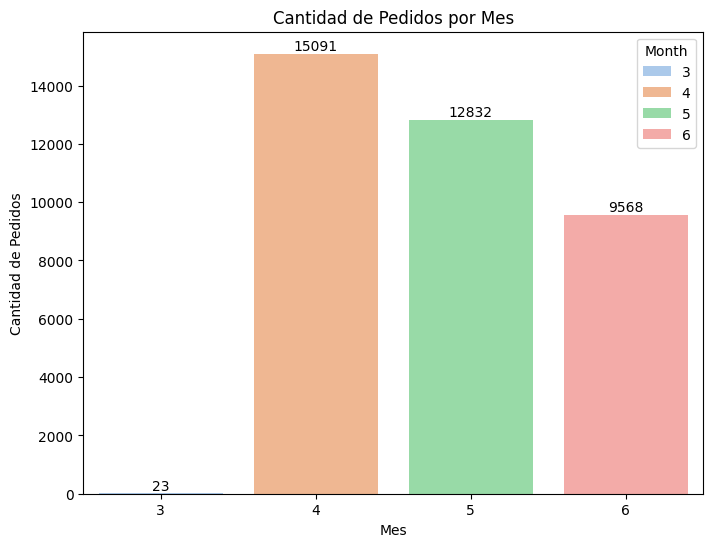

In [228]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Month', hue='Month', data=dataset, palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pedidos')
plt.title('Cantidad de Pedidos por Mes')
plt.show()

A lo largo de los meses, se ve que hay reducción de pedidos

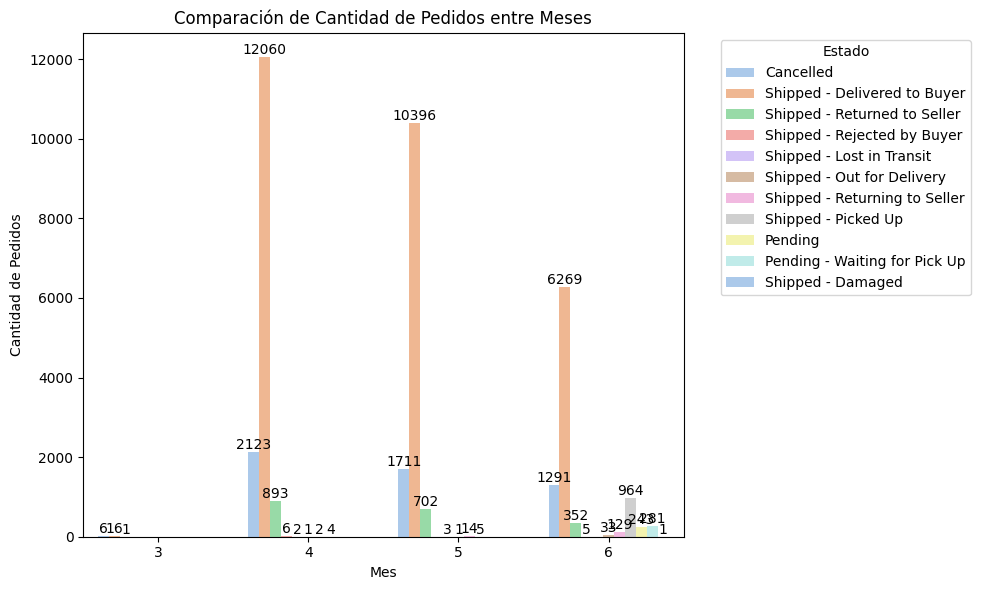

In [181]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Month', hue='Status', data=dataset, palette='pastel')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pedidos')
plt.title('Comparación de Cantidad de Pedidos entre Meses')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()


Los pedidos cancelados decrementan también. Tendriamos que estudiar la causa de esto

## Analizando proporción de clientes tipo B2B

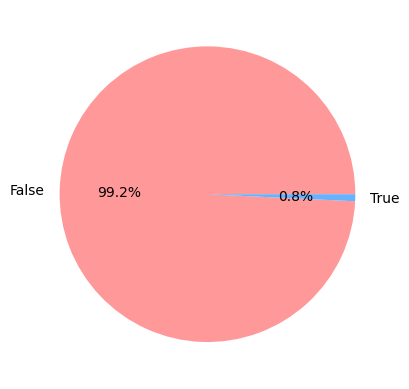

In [188]:
B2B_counter = dataset['B2B'].value_counts()
custom_colors = ['#FF9999', '#66B2FF']
plt.pie(B2B_counter, labels=B2B_counter.index, autopct='%1.1f%%', colors=custom_colors)
plt.show()

99.2% de los compradores noo son clientes B2B.

## Analiazndo compradores por estado de entrega

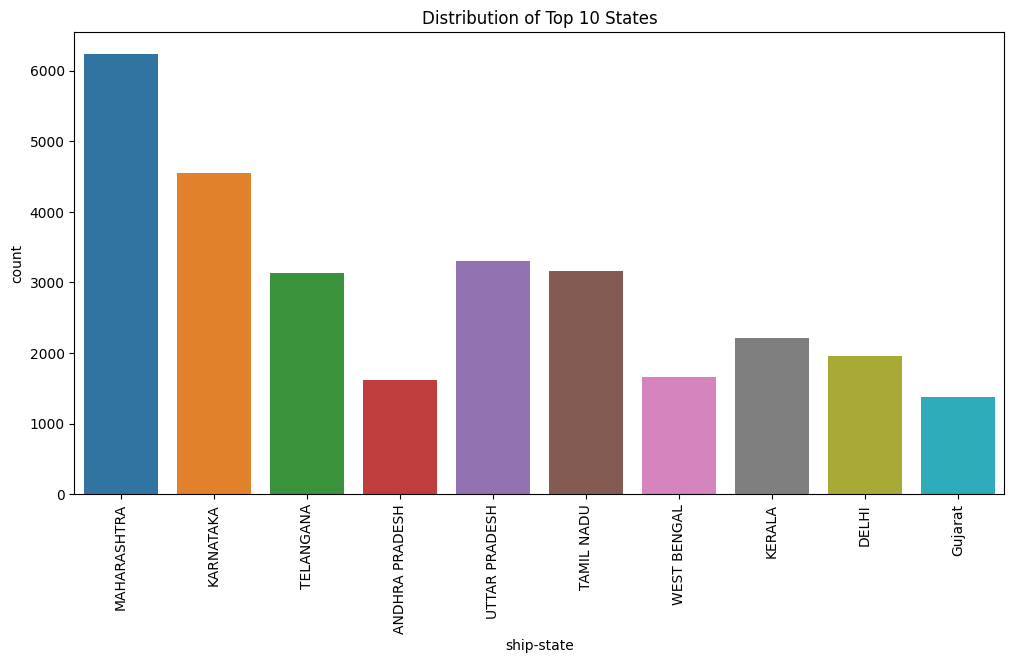

In [192]:
top_10_states = dataset['ship-state'].value_counts().head(10)
filtered_data = dataset[dataset['ship-state'].isin(top_10_states.index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='ship-state', hue='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of Top 10 States')
plt.xticks(rotation=90)
plt.show()


La mayoria de compradores son del estado de Maharashtra.

### Conclusion

Tras el análisis de datos vemos que la empresa tiene una importante base de clientes en el estado de Maharashtra quienes gestionan sus pedidos a través de Amazon y tienen  una gran demanda de Shirts con talla M.